### 1. Задача медицинской диагностики - классификация по 2 классам. 
Если target == 0, нет подозрений на сердечные недуги,
если target == 1, есть.

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('heart.csv')
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Признаки:
1) age - возраст
2) sex - пол
3) cp - chest pain - тип боли в груди (4 типа)
4) trestbps - resting blood pressure - кровяное давление в покое
5) chol - serum cholesterol - сывороточный холестерин
6) fbs - fasting blood sugar - уровень сахара в крови натощак (>120 mg/dl)
7) restecg - resting ecg results - результаты ЭКГ в покое
8) thalach - maximum heart rate achieved - максимальная частота сердечных сокращений
9) exang - exercise induced angina - стенокардия при физ. нагрузках
10) oldpeak - ST depression induced by exercise ST segment - депрессия сегмента ST
11) slope - the slope of the peak exercise ST segment - наклон пика сегмента ST
12) ca - number of major vessels colored by flourosopy  - количество больших сосудов, окрашенных при рентгеноскопии (0-3)
13) thal - 0: normal, 1: fixed defect, 2: reversable defect

More: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### 2. EDA, визуальный анализ

In [3]:
binary = ['sex','fbs','exang']
categorial = ['cp', 'restecg', 'slope', 'ca', 'thal' ]
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data.isnull().sum() # Mmm, nice :^)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dfalive = data[data['target'] == 1]
dfdead = data[data['target'] == 0]

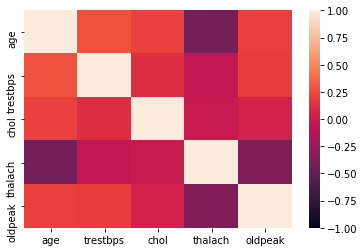

In [9]:
corr_matrix = data[numeric].corr()
sns.heatmap(corr_matrix, vmin = -1, vmax = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002511367AA88>,
      dtype=object)

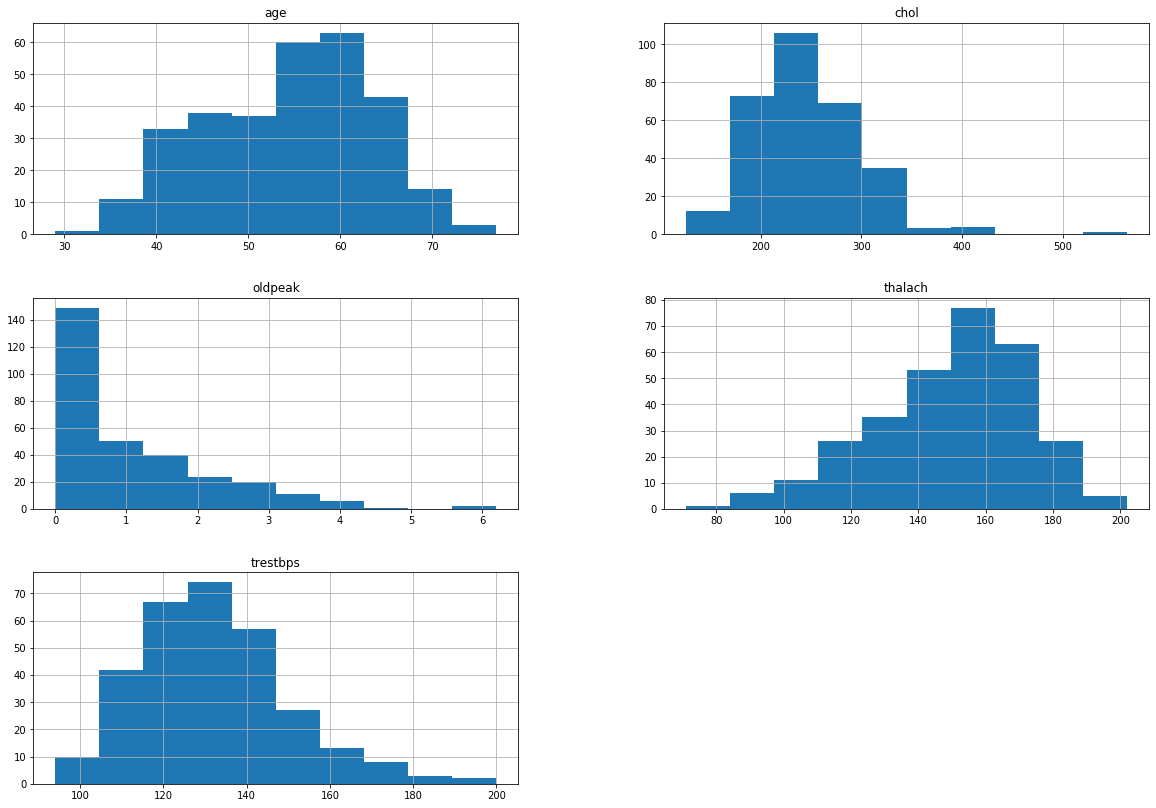

In [10]:
data[numeric].hist(figsize = (20, 14))

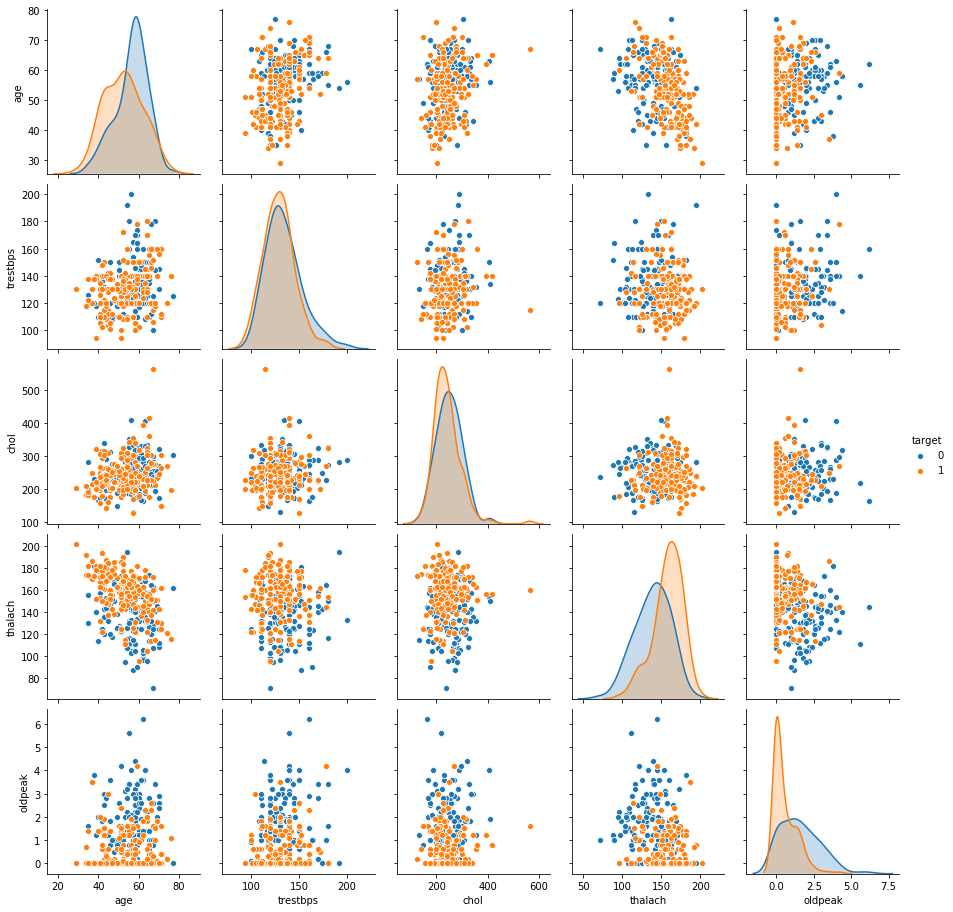

In [11]:
sns.pairplot(data[numeric + ['target']], hue = 'target')

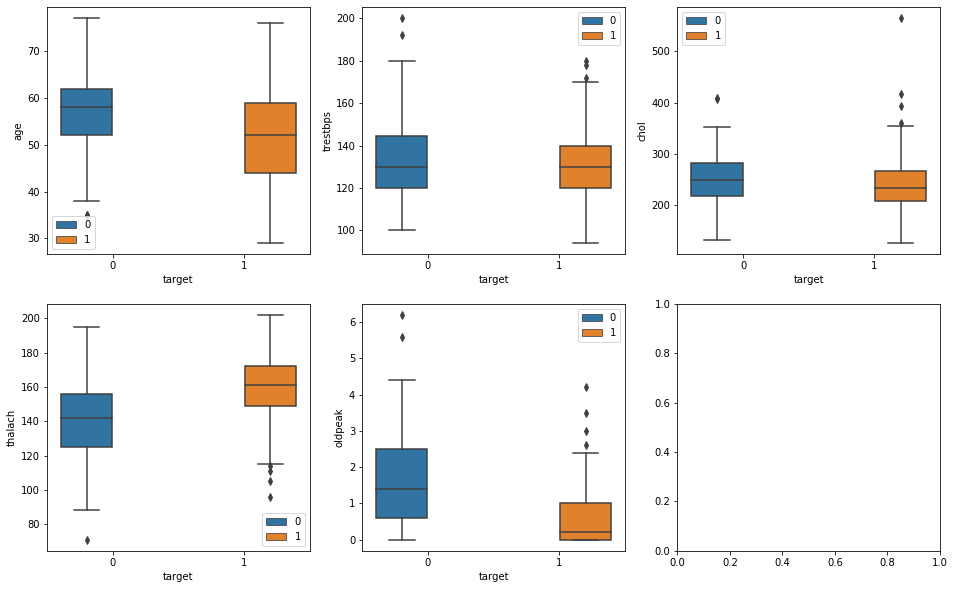

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, feat in enumerate(numeric):
    sns.boxplot(x='target', y=feat, data=data, hue = 'target',  ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].legend()
    axes[idx // 3, idx % 3].set_xlabel('target')
    axes[idx // 3, idx % 3].set_ylabel(feat);

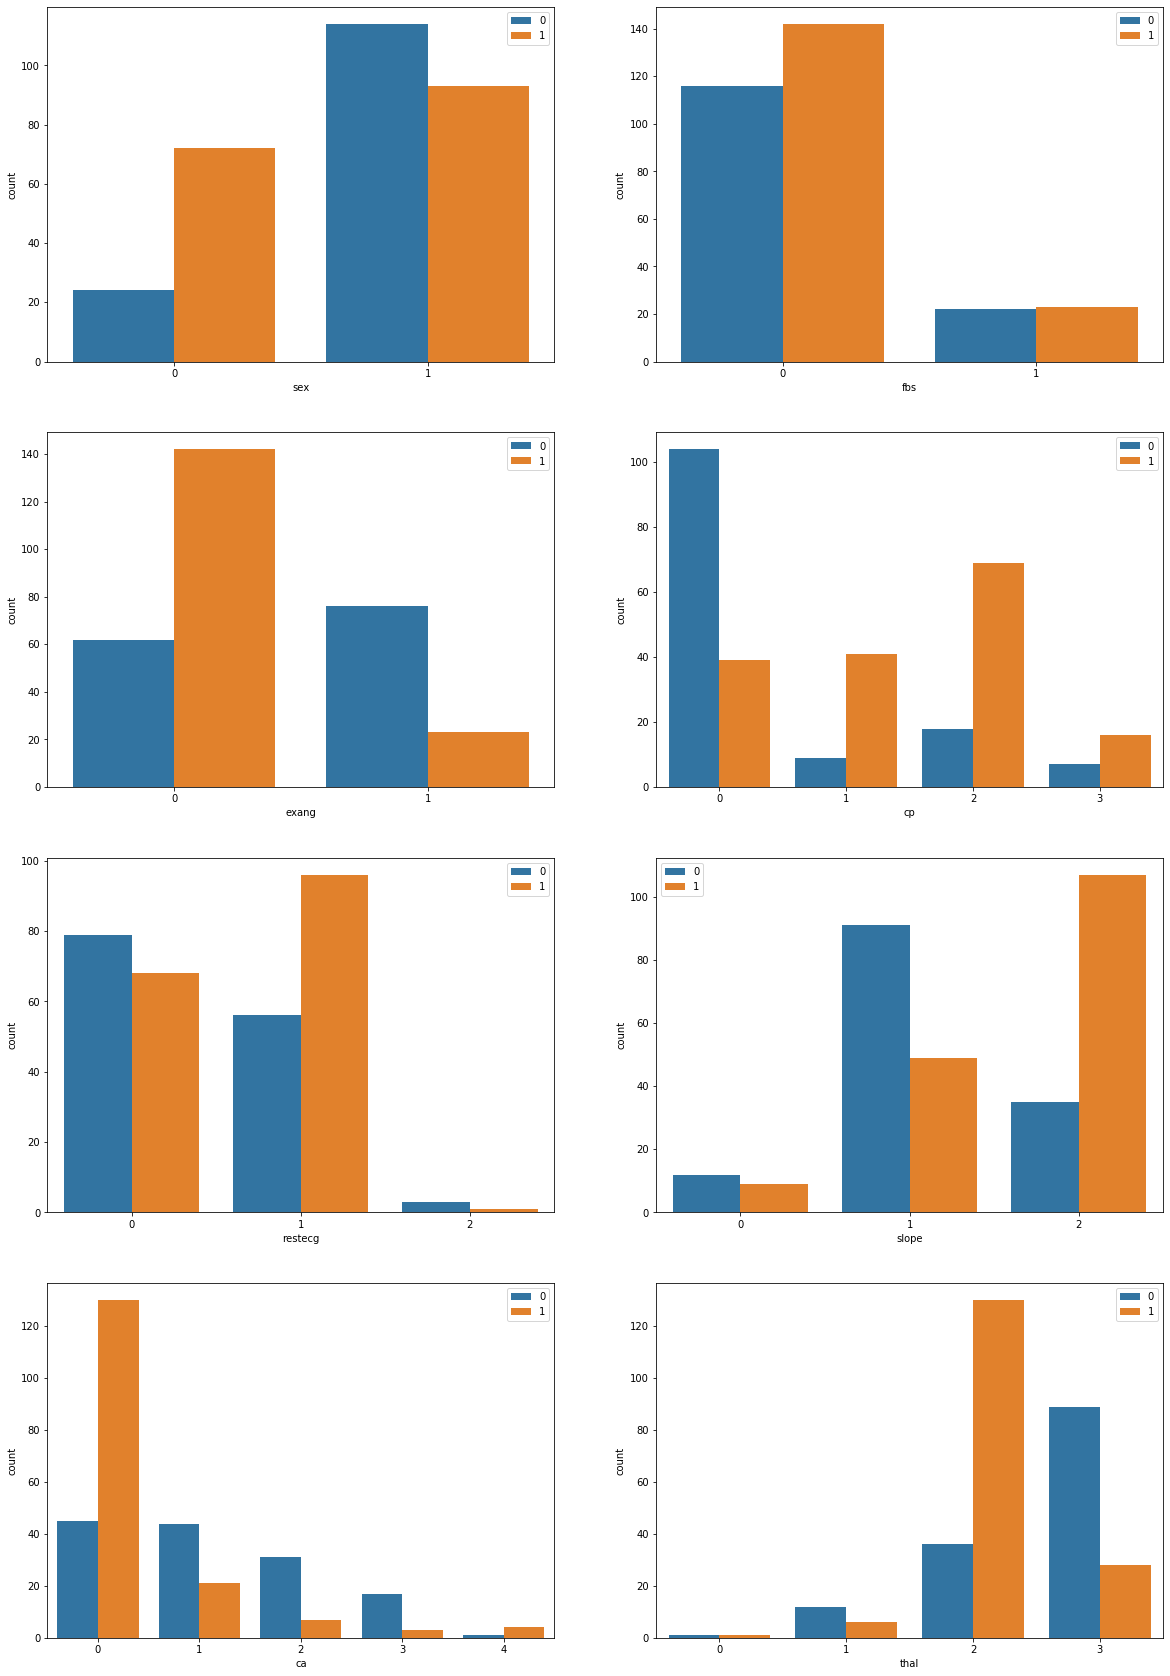

In [12]:
fig1, axes1 = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 30))
for idx, feat in enumerate(binary + categorial):
    sns.countplot(x=feat, hue='target', data=data, ax = axes1[idx // 2, idx % 2])
    axes1[idx // 2, idx % 2].legend()
    axes1[idx // 2, idx % 2].set_xlabel(feat)
    axes1[idx // 2, idx % 2].set_ylabel('count');

### Некоторые выводы и наблюдения:
#### 1) trestbps: из рисунка ниже следует, что признак, вероятно, не информативен, аналогичные выводы можно получить для признаков chol и fbs;
#### 2) ca == 0 => доля больных гораздо больше, вероятно признак "сильный";
#### 3) сильных корреляций между числовыми признаками не наблюдается;

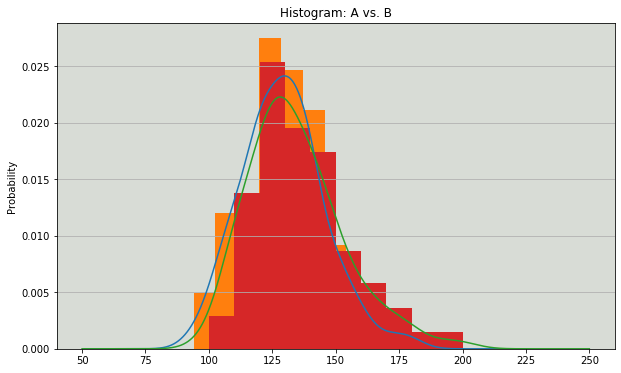

In [13]:
fig2, ax2 = plt.subplots(figsize = (10,6))
dfalive['trestbps'].plot.kde(ax=ax2, legend=False, title='Histogram: A vs. B')
dfalive['trestbps'].plot.hist(density=True, ax=ax2)
dfdead['trestbps'].plot.kde(ax=ax2, legend=False, title='Histogram: A vs. B')
dfdead['trestbps'].plot.hist(density=True, ax=ax2)
ax2.set_ylabel('Probability')
ax2.grid(axis='y')
ax2.set_facecolor('#d8dcd6')

### 3. О используемых метриках:
#### 1) Accuracy. Интуитивно самая понятная;
#### 2) Recall. В данной задаче Recall важнее Precision - сделать несколько доп. тестов и понять, что больной здоров, менее "страшно", чем пропустить больного;
#### 3) Precision. Тем не менее, не хочется делать мильон тестов :^)
#### 3) F-мера для усреднения Recall и Precision;
#### 4) Хоть и не наблюдается сильного дисбаланса классов, используем AUC-ROC, обладающую следующей интерпретацией: AUC-ROC = P(объект класса 1 получит оценку вероятности принадлежности к классу 1 выше, чем объект класса 0).

### 4. О выбранных моделях
#### 1) Логистическая регрессия. Выбор данной модели обусловлен её способностью получать оценки принадлежности объектов к классам;
#### 2) Бэггинг и случайный лес. Является одним из самых эффективных алгоритмов машинного обучения, помимо этого случайный лес позволяет оценить важность признаков;
#### 3) Градиентный бустинг над случайным лесом. Обычно работает лучше, чем случайный лес.

### 5. О признаках и алгоритме решения: 
####     1) закодируем все категориальные признаки с помощью one-hot кодирования;
####     2) осуществим обучение моделей на всём полученном датасете, подберем гиперпараметры, оценим модели;
####     3) а зачем все усложнять? :^) Повторим пункт 2 без категориальных признаков;
####     4) для возможного улучшения качества модели с помощью SelectKBest для разных K и разных score_func = {mutual_info_classif, chi2, f_classif} упростим признаковое описание и повторим п. 2.

In [14]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

metrics = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
gensplit = KFold(n_splits=5, shuffle=True, random_state=42)



##### One-hot кодирование

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')
X = data[categorial]
enc.fit(X)
xTr = pd.DataFrame(enc.transform(X).toarray()) # np.shape(xTr) = 303, 19
newdata = data.drop(columns = categorial)
newdata = pd.concat([newdata, xTr], axis = 1)
newdata = newdata.drop(columns = 'target')
X_train, X_test, y_train, y_test = train_test_split(newdata, data['target'], test_size=0.33)

In [16]:
#enc.get_feature_names()

In [17]:
gridLog = {'C': np.linspace(0.01, 5, 50)}
gridRF =  {'n_estimators': range(50, 351, 5) }
gridGB =  {'n_estimators': range(50, 351, 10) , 'learning_rate': np.linspace(0.001, 2, 8)}


### Логистическая регрессия

In [18]:
lrclf = LogisticRegression(max_iter = 10000)

In [19]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(lrclf, gridLog, scoring=metric, cv=gensplit)
    gs.fit(X_train, y_train)
    print(metric, ':',  np.mean(cross_val_score(LogisticRegression(max_iter = 10000, C = gs.best_params_['C']) , 
                                                X_test, y_test, cv=gensplit, scoring=metric)), '|',  gs.best_params_ )

Оценки на отложенных данных
accuracy : 0.75 | {'C': 2.454081632653061}
recall : 0.8105194805194806 | {'C': 0.11183673469387755}
precision : 0.7619580419580421 | {'C': 1.3338775510204082}
f1 : 0.7968041762159409 | {'C': 0.8246938775510204}
roc_auc : 0.8212913752913753 | {'C': 0.5191836734693878}


In [20]:
bestlr = LogisticRegression(max_iter = 10000, C = 0.31551020408163266).fit(X_train, y_train)
for metric in metrics:
    print(metric, ':',  np.mean(cross_val_score(bestlr, X_test, y_test, cv=gensplit, scoring = metric)))

accuracy : 0.7700000000000001
recall : 0.8287012987012986
precision : 0.7681918081918082
f1 : 0.7913596207713856
roc_auc : 0.8192711732711733


### Случайный лес (with bootstrap)

In [21]:
RF = ExtraTreesClassifier(bootstrap=True)

In [22]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(RF, gridRF, scoring=metric, cv=gensplit)
    gs.fit(X_train, y_train)
    print(metric, ':',  
          np.mean(cross_val_score(ExtraTreesClassifier(bootstrap = True, n_estimators = gs.best_params_['n_estimators']),
                                  X_test, y_test, cv=gensplit, scoring=metric)), '|:', gs.best_params_)

Оценки на отложенных данных
accuracy : 0.77 |: {'n_estimators': 85}
recall : 0.8568831168831169 |: {'n_estimators': 290}
precision : 0.7666958041958042 |: {'n_estimators': 50}
f1 : 0.7961001317523058 |: {'n_estimators': 310}
roc_auc : 0.8475948218448218 |: {'n_estimators': 75}


### Градиентный бустинг над случайным лесом

In [24]:
GBclf = GradientBoostingClassifier()

In [25]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(GBclf, gridGB, scoring=metric, cv=gensplit)
    gs.fit(X_train, y_train)
    print(metric, ':',  
          np.mean(cross_val_score(GradientBoostingClassifier(n_estimators=gs.best_params_['n_estimators'],
                                                             learning_rate=gs.best_params_['learning_rate']), 
                                                X_test, y_test, cv=gensplit, scoring=metric)), 
          '|', 
          gs.best_params_)

Оценки на отложенных данных
accuracy : 0.5900000000000001 | {'learning_rate': 0.5721428571428572, 'n_estimators': 50}
recall : 0.9199999999999999 | {'learning_rate': 0.001, 'n_estimators': 50}
precision : 0.6260317460317462 | {'learning_rate': 0.5721428571428572, 'n_estimators': 60}
f1 : 0.583264754177533 | {'learning_rate': 0.5721428571428572, 'n_estimators': 50}
roc_auc : 0.7132300754800754 | {'learning_rate': 0.8577142857142858, 'n_estimators': 210}


## Осуществим то же самое, удалив из данных категориальные признаки

In [27]:
lrclf = LogisticRegression(max_iter = 10000)
RF = ExtraTreesClassifier(bootstrap=True)
GBclf = GradientBoostingClassifier()


X_train1, X_test1, y_train1, y_test1 = train_test_split(data.drop(columns = categorial + ['target']), data['target'], test_size=0.33)


### Логистическая регрессия

In [28]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(lrclf, gridLog, scoring=metric, cv=gensplit)
    gs.fit(X_train1, y_train1)
    print(metric, ':',  np.mean(cross_val_score(LogisticRegression(max_iter = 10000, C = gs.best_params_['C']) , 
                                                X_test1, y_test1, cv=gensplit, scoring=metric)), '|',  gs.best_params_ )





Оценки на отложенных данных
accuracy : 0.72 | {'C': 0.2136734693877551}
recall : 0.7570451770451772 | {'C': 0.11183673469387755}
precision : 0.7736363636363637 | {'C': 1.0283673469387755}
f1 : 0.722867132867133 | {'C': 0.2136734693877551}
roc_auc : 0.856930624930625 | {'C': 0.7228571428571429}


### Случайный лес

In [29]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(RF, gridRF, scoring=metric, cv=gensplit)
    gs.fit(X_train1, y_train1)
    print(metric, ':',  
          np.mean(cross_val_score(ExtraTreesClassifier(bootstrap = True, n_estimators = gs.best_params_['n_estimators']),
                                  X_test1, y_test1, cv=gensplit, scoring=metric)), '|:', gs.best_params_)


Оценки на отложенных данных
accuracy : 0.71 |: {'n_estimators': 285}
recall : 0.7302075702075703 |: {'n_estimators': 75}
precision : 0.7433333333333333 |: {'n_estimators': 80}
f1 : 0.677617480558657 |: {'n_estimators': 95}
roc_auc : 0.8442922632922633 |: {'n_estimators': 150}


### Бустинг

In [30]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(GBclf, gridGB, scoring=metric, cv=gensplit)
    gs.fit(X_train1, y_train1)
    print(metric, ':',  
          np.mean(cross_val_score(GradientBoostingClassifier(n_estimators=gs.best_params_['n_estimators'],
                                                             learning_rate=gs.best_params_['learning_rate']), 
                                                X_test1, y_test1, cv=gensplit, scoring=metric)), 
          '|', 
          gs.best_params_)

Оценки на отложенных данных
accuracy : 0.67 | {'learning_rate': 0.001, 'n_estimators': 320}
recall : 0.8824175824175825 | {'learning_rate': 0.001, 'n_estimators': 50}
precision : 0.738974358974359 | {'learning_rate': 0.2865714285714286, 'n_estimators': 60}
f1 : 0.6957902001380262 | {'learning_rate': 0.001, 'n_estimators': 320}
roc_auc : 0.7722973692973694 | {'learning_rate': 0.001, 'n_estimators': 340}


### Метрики ухудшаются, очевидно, что происходит потеря важной информации. Используем RandomForest-классификатор, найденный выше, рассмотрим важности признаков.

In [79]:
bestRF = ExtraTreesClassifier(bootstrap=True, n_estimators=125).fit(X_train, y_train)
bestRF.feature_importances_

array([0.04102783, 0.03549876, 0.03607513, 0.03664659, 0.00703693,
       0.05271614, 0.05040071, 0.04431732, 0.12836131, 0.02342363,
       0.03386079, 0.01800486, 0.01913609, 0.01980309, 0.00217985,
       0.00685235, 0.03082661, 0.042496  , 0.11909469, 0.03789076,
       0.02239181, 0.02141456, 0.00089014, 0.00158204, 0.0059792 ,
       0.09124399, 0.07084882])

In [82]:
newdata

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,0,1,...,9,10,11,12,13,14,15,16,17,18
0,63,1,145,233,1,150,0,2.3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,0,130,204,0,172,0,1.4,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,1,120,236,0,178,0,0.8,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57,0,120,354,0,163,1,0.6,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,45,1,110,264,0,132,0,1.2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,68,1,144,193,1,141,0,3.4,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,57,1,130,131,0,115,1,1.2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Попробуем улучшить качество классификации, выбрав 14 (важность > 0.03) лучших признаков с помощью SelectKBest.

In [32]:
score_funcs = [chi2, f_classif, mutual_info_classif]

gridLog = {'C': np.linspace(0.01, 5, 50)}
gridRF =  {'n_estimators': range(50, 351, 5) }
gridGB =  {'n_estimators': range(50, 351, 10) , 'learning_rate': np.linspace(0.001, 2, 8)}

lrclf = LogisticRegression(max_iter = 10000)
RF = ExtraTreesClassifier(bootstrap=True)
GBclf = GradientBoostingClassifier()

### Логистическая регрессия

In [33]:
print('Оценки на отложенных данных')
for score_func in score_funcs:
    print('========================================')
    print('score_func:', score_func)
    print('========================================')
    X_kBest = SelectKBest(score_func, k=14).fit_transform(newdata, data['target'])
    X_train, X_test, y_train, y_test = train_test_split(X_kBest, data['target'], test_size=0.33)
    for metric in metrics:
        gs = GridSearchCV(lrclf, gridLog, scoring=metric, cv=gensplit)
        gs.fit(X_train, y_train)
        print(metric, ':',  np.mean(cross_val_score(LogisticRegression(max_iter = 10000, C = gs.best_params_['C']) , 
                                                X_test, y_test, cv=gensplit, scoring=metric)), '|',  gs.best_params_ )
    print()

Оценки на отложенных данных
score_func: <function chi2 at 0x00000207375018B8>
accuracy : 0.8099999999999999 | {'C': 0.2136734693877551}
recall : 0.8269841269841269 | {'C': 0.11183673469387755}
precision : 0.8106643356643357 | {'C': 0.5191836734693878}
f1 : 0.8097300369423133 | {'C': 0.2136734693877551}
roc_auc : 0.9115960428460429 | {'C': 1.130204081632653}

score_func: <function f_classif at 0x0000020737501D38>
accuracy : 0.79 | {'C': 0.4173469387755102}
recall : 0.8715617715617716 | {'C': 0.4173469387755102}
precision : 0.7850330225330225 | {'C': 2.3522448979591832}
f1 : 0.8216678058783323 | {'C': 0.4173469387755102}
roc_auc : 0.8885076867576867 | {'C': 1.5375510204081633}

score_func: <function mutual_info_classif at 0x0000020737785438>
accuracy : 0.8100000000000002 | {'C': 0.2136734693877551}
recall : 0.8470085470085469 | {'C': 0.11183673469387755}
precision : 0.826946386946387 | {'C': 2.7595918367346934}
f1 : 0.8147878787878788 | {'C': 0.2136734693877551}
roc_auc : 0.9034630092130

### Случайный лес

In [34]:
print('Оценки на отложенных данных')
for score_func in score_funcs:
    print('========================================')
    print('score_func:', score_func)
    print('========================================')
    X_kBest = SelectKBest(score_func, k=14).fit_transform(newdata, data['target'])
    X_train, X_test, y_train, y_test = train_test_split(X_kBest, data['target'], test_size=0.33)
    for metric in metrics:
        gs = GridSearchCV(RF, gridRF, scoring=metric, cv=gensplit)
        gs.fit(X_train, y_train)
        print(metric, ':',  
          np.mean(cross_val_score(ExtraTreesClassifier(bootstrap = True, n_estimators = gs.best_params_['n_estimators']),
                                  X_test, y_test, cv=gensplit, scoring=metric)), '|:', gs.best_params_)
    print()

Оценки на отложенных данных
score_func: <function chi2 at 0x00000207375018B8>
accuracy : 0.8799999999999999 |: {'n_estimators': 65}
recall : 0.9247863247863248 |: {'n_estimators': 115}
precision : 0.8548318348318349 |: {'n_estimators': 65}
f1 : 0.8970292397660821 |: {'n_estimators': 145}
roc_auc : 0.9083048895548895 |: {'n_estimators': 130}

score_func: <function f_classif at 0x0000020737501D38>
accuracy : 0.9 |: {'n_estimators': 95}
recall : 0.9134032634032634 |: {'n_estimators': 140}
precision : 0.8958974358974359 |: {'n_estimators': 55}
f1 : 0.8856200031852207 |: {'n_estimators': 50}
roc_auc : 0.9633838383838385 |: {'n_estimators': 135}

score_func: <function mutual_info_classif at 0x0000020737785438>
accuracy : 0.8600000000000001 |: {'n_estimators': 195}
recall : 0.8718253968253968 |: {'n_estimators': 125}
precision : 0.8468253968253968 |: {'n_estimators': 65}
f1 : 0.8644724556489262 |: {'n_estimators': 280}
roc_auc : 0.841387085137085 |: {'n_estimators': 340}



### Бустинг

In [35]:
print('Оценки на отложенных данных')
for score_func in score_funcs:
    print('========================================')
    print('score_func:', score_func)
    print('========================================')
    X_kBest = SelectKBest(score_func, k=14).fit_transform(newdata, data['target'])
    X_train, X_test, y_train, y_test = train_test_split(X_kBest, data['target'], test_size=0.33)
    for metric in metrics:
        gs = GridSearchCV(GBclf, gridGB, scoring=metric, cv=gensplit)
        gs.fit(X_train, y_train)
        print(metric, ':',  
          np.mean(cross_val_score(GradientBoostingClassifier(n_estimators=gs.best_params_['n_estimators'],
                                                             learning_rate=gs.best_params_['learning_rate']), 
                                                X_test1, y_test1, cv=gensplit, scoring=metric)), 
          '|', 
          gs.best_params_)
    print()

Оценки на отложенных данных
score_func: <function chi2 at 0x00000207375018B8>
accuracy : 0.68 | {'learning_rate': 1.4288571428571428, 'n_estimators': 120}
recall : 0.8824175824175825 | {'learning_rate': 0.001, 'n_estimators': 50}
precision : 0.7373015873015873 | {'learning_rate': 1.4288571428571428, 'n_estimators': 100}
f1 : 0.6829869405956361 | {'learning_rate': 1.4288571428571428, 'n_estimators': 60}
roc_auc : 0.7457764457764458 | {'learning_rate': 1.1432857142857142, 'n_estimators': 220}

score_func: <function f_classif at 0x0000020737501D38>
accuracy : 0.7 | {'learning_rate': 0.2865714285714286, 'n_estimators': 100}
recall : 0.8824175824175825 | {'learning_rate': 0.001, 'n_estimators': 50}
precision : 0.7047619047619047 | {'learning_rate': 0.8577142857142858, 'n_estimators': 80}
f1 : 0.7360697197539302 | {'learning_rate': 0.5721428571428572, 'n_estimators': 90}
roc_auc : 0.787934287934288 | {'learning_rate': 0.2865714285714286, 'n_estimators': 90}

score_func: <function mutual_info

### Для графиков

In [48]:
names = ['ordinary', 'without cat. feat.', 'chi2', 'f_classif', 'mutual_info_classif']

AccLR = [0.78, 0.8, 0.78, 0.83, 0.82 ]
RecLR = [0.85, 0.83, 0.79, 0.84, 0.76]
PrecLR = [0.79, 0.79, 0.81, 0.84, 0.82]
F1LR = [0.83, 0.79, 0.81, 0.82, 0.81]
ROC_AUCLR = [0.83, 0.85, 0.88, 0.97, 0.88]


AccRF = [0.81, 0.74, 0.84, 0.83, 0.92]
RecRF = [0.86, 0.84, 0.90, 0.89, 0.93]
PrecRF = [0.85, 0.76, 0.85, 0.82, 0.91]
F1RF = [0.84, 0.77, 0.86, 0.83, 0.93]
ROC_AUCRF = [0.86, 0.84, 0.95, 0.86, 0.96]


AccGB = [0.74, 0.75, 0.7, 0.68, 0.71]
RecGB = [0.92, 0.88, 0.88, 0.88, 0.88]
PrecGB = [0.79, 0.75, 0.72, 0.74, 0.72]
F1GB = [0.79, 0.71, 0.69, 0.73, 0.69]
ROC_AUCGB = [0.79, 0.72, 0.72, 0.79, 0.69]


Text(0.5, 1.0, 'LogisticRegression')

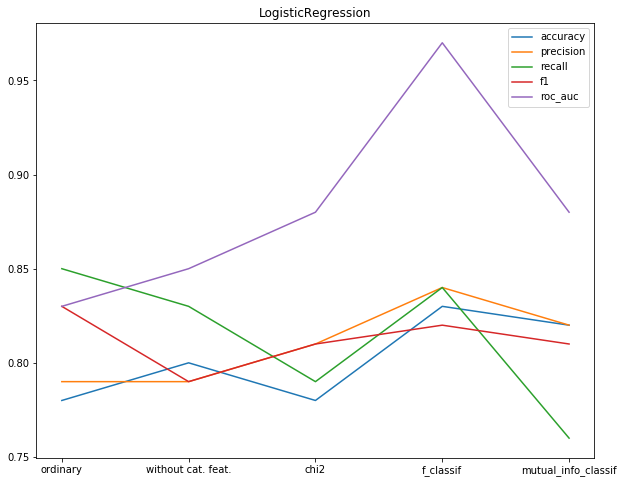

In [49]:
figLR, axLR = plt.subplots(figsize = (10,8))
line1 = axLR.plot(names, AccLR, label = 'accuracy')
line2 = axLR.plot(names, PrecLR, label = 'precision')
line3 = axLR.plot(names, RecLR, label = 'recall')
line4 = axLR.plot(names, F1LR, label = 'f1')
line5 = axLR.plot(names, ROC_AUCLR, label = 'roc_auc')
axLR.legend()
axLR.set_title('LogisticRegression')


Text(0.5, 1.0, 'RandomForest')

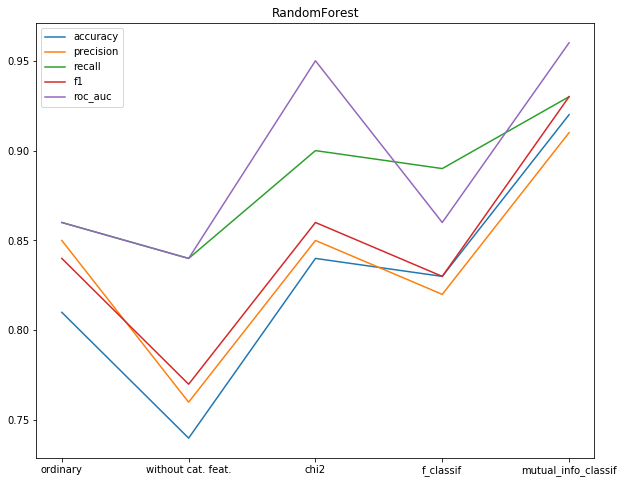

In [50]:
figRF, axRF = plt.subplots(figsize = (10,8))
line1 = axRF.plot(names, AccRF, label = 'accuracy')
line2 = axRF.plot(names, PrecRF, label = 'precision')
line3 = axRF.plot(names, RecRF, label = 'recall')
line4 = axRF.plot(names, F1RF, label = 'f1')
line5 = axRF.plot(names, ROC_AUCRF, label = 'roc_auc')
axRF.legend()
axRF.set_title('RandomForest')


Text(0.5, 1.0, 'GradientBoosting')

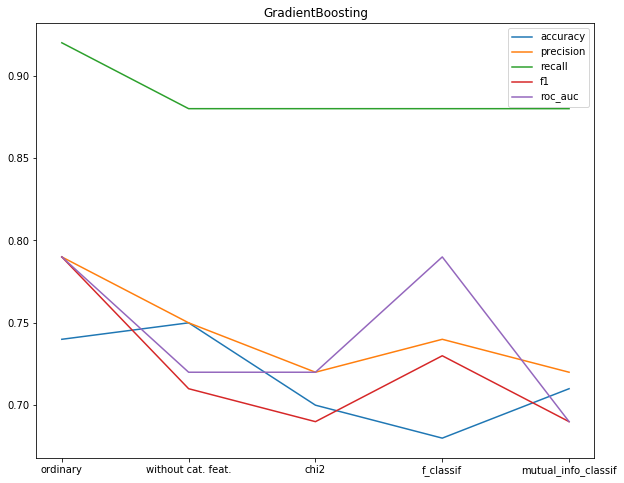

In [51]:
figGB, axGB = plt.subplots(figsize = (10,8))
line1 = axGB.plot(names, AccGB, label = 'accuracy')
line2 = axGB.plot(names, PrecGB, label = 'precision')
line3 = axGB.plot(names, RecGB, label = 'recall')
line4 = axGB.plot(names, F1GB, label = 'f1')
line5 = axGB.plot(names, ROC_AUCGB, label = 'roc_auc')
axGB.legend()
axGB.set_title('GradientBoosting')


### Все ли в порядке с recall-ом? :^)

In [71]:
print('Оценки на отложенных данных')
GBcheck = {'n_estimators': range(1, 21, 1),'learning_rate':  np.power(10.0, np.arange(-10,0))}
for metric in metrics:
    gs = GridSearchCV(GBclf, GBcheck, scoring='recall', cv=gensplit)
    gs.fit(X_train, y_train)
    print(metric, ':',  
          np.mean(cross_val_score(GradientBoostingClassifier(n_estimators=gs.best_params_['n_estimators'],
                                                             learning_rate=gs.best_params_['learning_rate']), 
                                                X_test, y_test, cv=gensplit, scoring=metric)), 
          '|', 
          gs.best_params_)

Оценки на отложенных данных
accuracy : 0.5599999999999999 | {'learning_rate': 1e-10, 'n_estimators': 1}
recall : 1.0 | {'learning_rate': 1e-10, 'n_estimators': 1}
precision : 0.5599999999999999 | {'learning_rate': 1e-10, 'n_estimators': 1}
f1 : 0.7167155425219942 | {'learning_rate': 1e-10, 'n_estimators': 1}
roc_auc : 0.7294816294816295 | {'learning_rate': 1e-10, 'n_estimators': 1}


In [78]:
# Посмотрим на соотношение классов в тестовой выборке
first, null, total =  np.sum(y_test==1), np.sum(y_test==0), np.sum(y_test==1) + np.sum(y_test==0)
print(first/total, null/total)

0.56 0.44


### Интересное наблюдение: recall достигает максимума при n_estimators = 1, метрики accuracy и precision приближаются при этом к соотношению 1 класса. По всей видимости, при n_estimators -> 1 и при неограниченном уменьшении learning_rate алгоритм вырождается в константный. Очевидно, использовать такой алгоритм бессмысленно.

### Градиентный бустинг проигрывает случайному лесу. Вероятно, это обуславливается малым размером выборки. Поскольку случайный лес оказался наилучшим алгоритмом (в смысле используемых выше метрик) и наилучшее качество достигается при score_func = mutual_info_classif, попробуем "покрутить" параметр k в SelectKBest с score_func = mutual_info_classif именно для него. 

In [40]:
# Что ж, придётся подождать.
gridRFKBest =  {'n_estimators': range(50, 251, 5) }
qual = []
for metric in metrics:
    for k in range(1, 28):
        X_kBest = SelectKBest(mutual_info_classif, k=k).fit_transform(newdata, data['target'])
        X_train, X_test, y_train, y_test = train_test_split(X_kBest, data['target'], test_size=0.33)
        gs = GridSearchCV(RF, gridRFKBest, scoring=metric, cv=gensplit)
        gs.fit(X_train, y_train)
        qual.append(np.mean(cross_val_score(ExtraTreesClassifier(bootstrap = True, n_estimators = gs.best_params_['n_estimators']),
                                  X_test, y_test, cv=gensplit, scoring=metric)))

Text(0.5, 1.0, 'RandomForest with KBest')

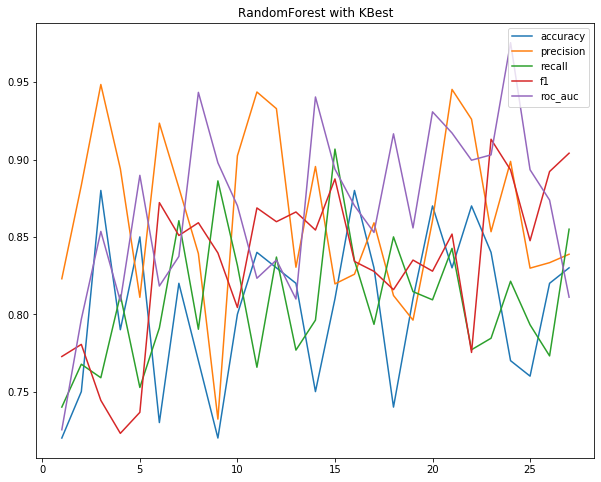

In [83]:
figRFKBest, axRFKBest = plt.subplots(figsize = (10,8))
ks = [i for i in range(1,28)]
line1 = axRFKBest.plot(ks, qual[:27], label = 'accuracy')
line2 = axRFKBest.plot(ks, qual[27:54], label = 'precision')
line3 = axRFKBest.plot(ks, qual[54:81], label = 'recall')
line4 = axRFKBest.plot(ks, qual[81:108], label = 'f1')
line5 = axRFKBest.plot(ks, qual[108:], label = 'roc_auc')
axRFKBest.legend()
axRFKBest.set_title('RandomForest with KBest')


#### Разумным представляется использовать 15 лучших признаков.

### 6. Возможные применения
###     Думается, что в медицинской диагностике. :^)

### 7. Предложения по улучшению
###     Одним из самых эффективных алгоритмов машинного обучения также являются нейронные сети. Возможно, стоило бы опробовать их при наличии более объемного датасета.
###     Поскольку логистическая регрессия относится к линейным методам классификации, стоило осуществить стандартизацию признакового пространства (да-да, главное - вовремя!). 